In [1]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/99.8 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 0.5/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.7/99.8 MB 3.7 MB/s eta 0:00:27
   ---------------------------------------- 0.9/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.2/99.8 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.4/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.6/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.9/99.8 MB 4.4 MB/s eta 0:00:23
    ----------------------------

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color_pal = sns.color_palette()
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [16]:
df = pd.read_csv('./archive 2/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'PJME Energy use in MW'}, xlabel='Datetime'>

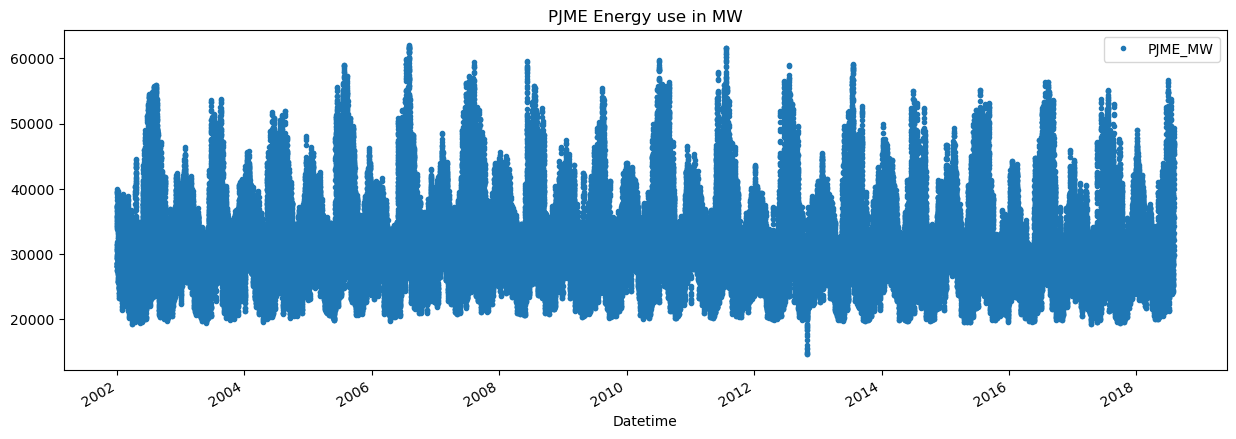

In [17]:
df.plot(style= '.', figsize=(15,5), color = color_pal[0], title = 'PJME Energy use in MW')

In [18]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


# Train / Test Split

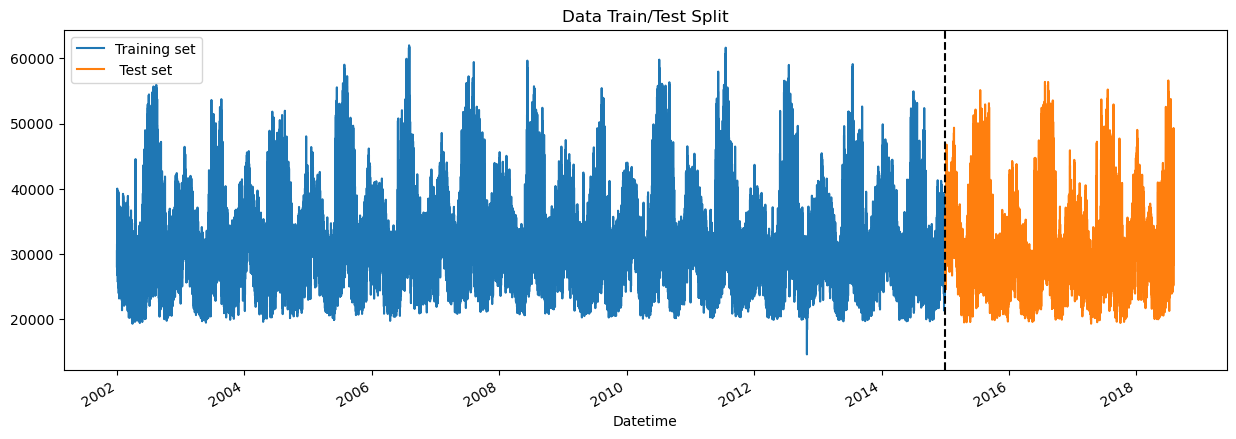

In [24]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax =plt.subplots(figsize=(15,5))
train.plot(ax =ax , label = 'training set', title = 'Data Train/Test Split')
test.plot(ax=ax, label = 'test set')
ax.axvline('01-01-2015',color = 'black' , ls='--')
ax.legend(['Training set',' Test set '])
plt.show()

<Axes: title={'center': 'Week Of Data'}, xlabel='Datetime'>

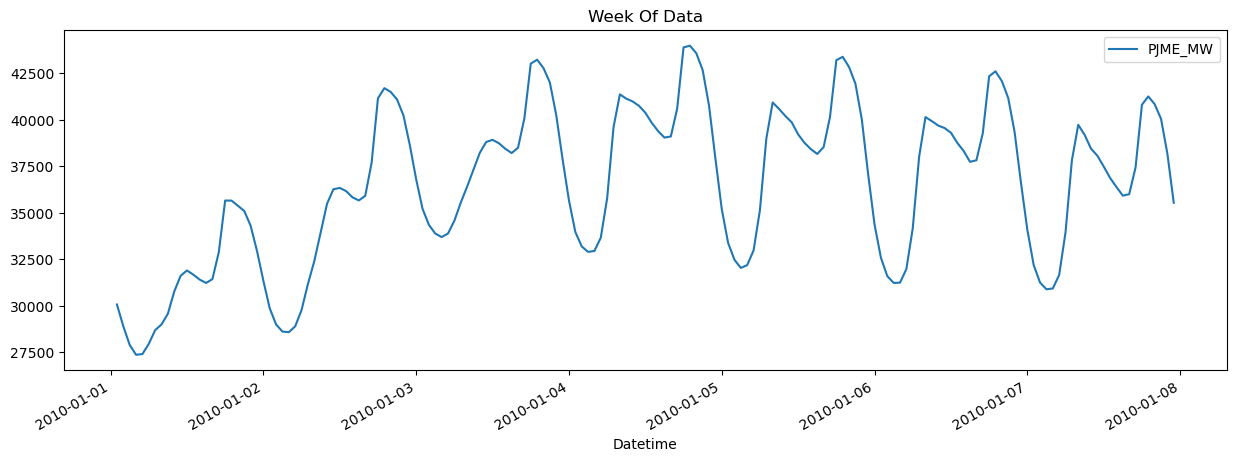

In [29]:
df.loc[(df.index > '01-01-2010')  & (df.index < '01-08-2010')].plot( figsize=(15,5), title = 'Week Of Data')

# Feature Creation

In [33]:
def Create_Features(df):
    
    df=df.copy()
    df['Hour']=df.index.hour
    df['DayofWeek'] = df.index.day_of_week
    df['Quater'] = df.index.quarter
    df['Month'] = df.index .month
    df['Year']= df.index.year
    df['dayofyear'] = df.index.dayofyear
    
    return df

df = Create_Features(df)

# Visualize Feature /Target Relationship

Text(0.5, 1.0, 'MW by Hour')

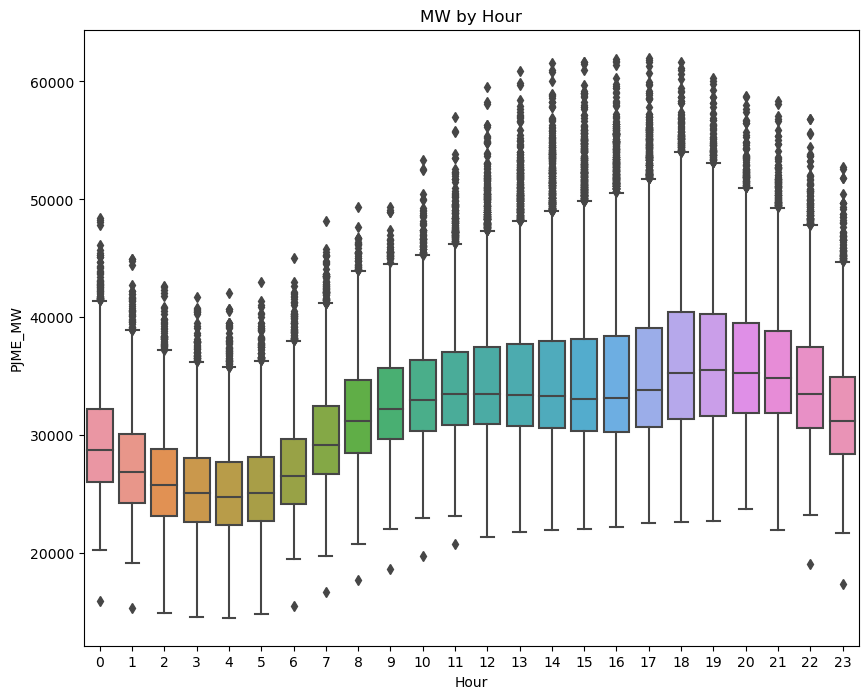

In [36]:
fig , ax = plt.subplots(figsize =(10,8))
sns.boxplot(data = df , x='Hour', y='PJME_MW')
ax.set_title('MW by Hour')

Text(0.5, 1.0, 'MW by Month')

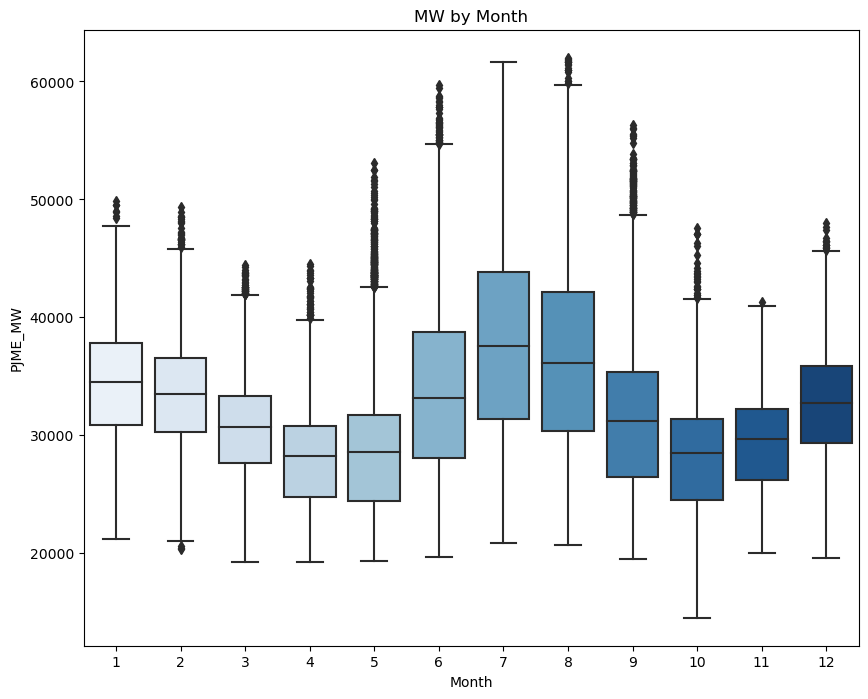

In [37]:
fig , ax = plt.subplots(figsize =(10,8))
sns.boxplot(data = df , x='Month', y='PJME_MW', palette = 'Blues')
ax.set_title('MW by Month')

## Create Our Model

In [39]:
train = Create_Features(train)
test = Create_Features(test)

C:\Users\o876\AppData\Local\Temp\ipykernel_14952\377223063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\o876\AppData\Local\Temp\ipykernel_14952\377223063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek'] = df.index.day_of_week
C:\Users\o876\AppData\Local\Temp\ipykernel_14952\377223063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [43]:
FEATURES = ['Hour','DayofWeek','Quater','Month','Year','dayofyear' ]
TARGET = ['PJME_MW']

In [44]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [50]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(x_train,y_train ,
       eval_set = [(x_train,y_train),(x_test,y_test)],
       verbose = 100)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.26089


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance

In [51]:
f1= pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns = ['importance'])

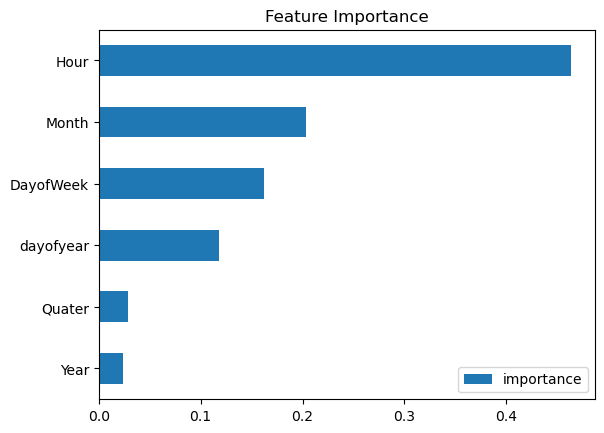

In [53]:
f1.sort_values('importance').plot(kind='barh',title = 'Feature Importance')
plt.show()

# Forecast on Test Set

In [55]:
test['prediction']= reg.predict(x_test)

C:\Users\o876\AppData\Local\Temp\ipykernel_14952\3244745412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']= reg.predict(x_test)


In [58]:
df = df.merge(test[['prediction']], how = 'left' , left_index =True, right_index = True)

In [59]:
df.head()

,PJME_MW,Hour,DayofWeek,Quater,Month,Year,dayofyear,prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN


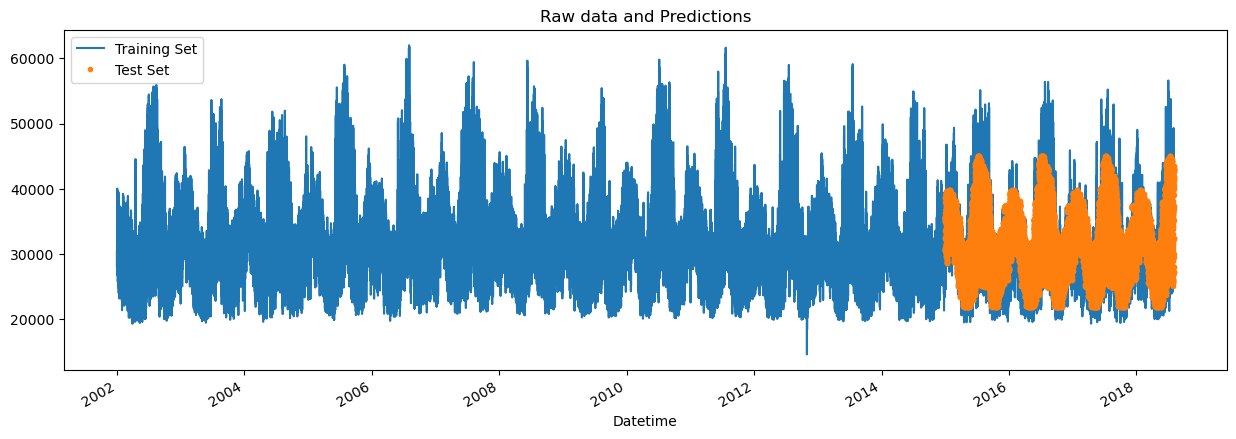

In [62]:
ax = df[['PJME_MW']].plot(figsize = (15,5))
df['prediction'].plot(ax=ax, style='.')
ax.set_title('Raw data and Predictions')
plt.legend(['Training Set' , 'Test Set'])
plt.show()

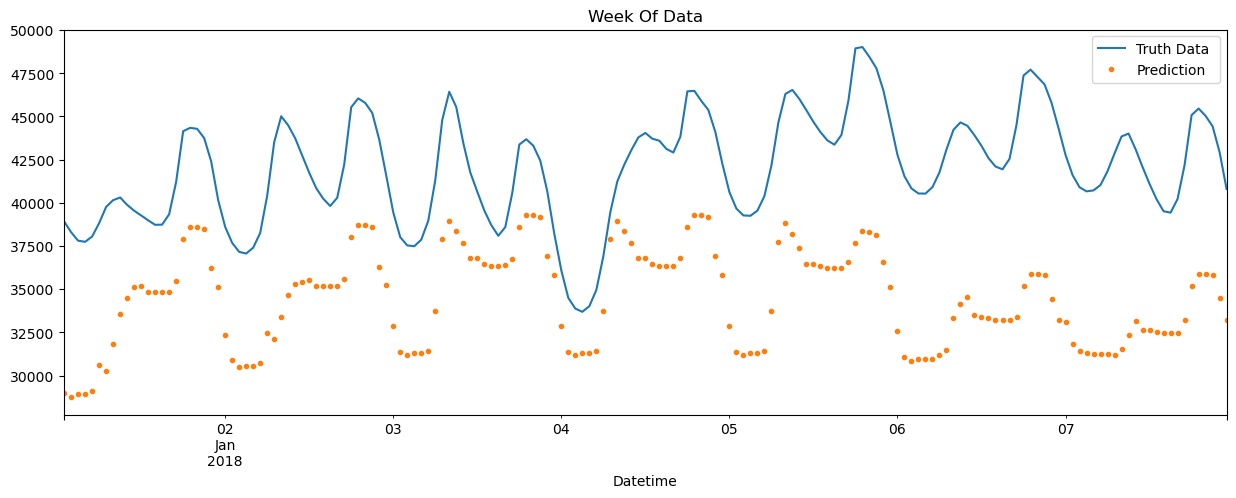

In [64]:
ax = df.loc[(df.index > '01-01-2018')  & (df.index < '01-08-2018')]['PJME_MW'].plot( figsize=(15,5), title = 'Week Of Data')
df.loc[(df.index > '01-01-2018')  & (df.index < '01-08-2018')]['prediction'].plot( style = '.')
plt.legend(['Truth Data ', 'Prediction'])
plt.show()